In [71]:
import numpy as np
import pandas as pd


In [72]:
from pandas import DataFrame,Series

## SCROLL DOWN TO FINAL WORKING FOR THE RIGHT APPROACH

### Outlier treatment - capping and flooring
### Missing value treatment - forward imputation , backward imputation and subjective imputation

In [73]:
rt=pd.read_csv('retail_data.csv', encoding='latin-1')

In [74]:
rt.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
rt.tail()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
224,Jan'17,21-Jan-17,EC21011770512,Dealer,Lost,TAMILNADU,CHENNAI,600014,Renovation,11 to 20,...,NaN,Price Issue,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,Jan'17,23-Jan-17,EC24011770882,Direct,Won,TAMILNADU,CHENNAI,600015,Renovation,1 to 5,...,NaN,NaN,945,Low Maintenance,0.0,0.0,1.0,0.0,0.0,0.0
226,Jan'17,26-Jan-17,EC26121667587,Direct,Lost,TAMILNADU,CHENNAI,600119,Renovation,1 to 5,...,NaN,No Requirment,1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Jan'17,27-Jan-17,EC27011771169,Dealer,Lost,TAMILNADU,CHENNAI,600082,Renovation,1 to 5,...,NaN,Design Infeasibility,849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Jan'17,27-Jan-17,EC27011771160,Direct,Lost,TAMILNADU,KANCHIPURAM,600089,New Construction,1 to 5,...,NaN,Price Issue,946,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 40 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

In [77]:
rt['Dealer Name'].unique()

array(['Sunbird', 'Winfratech', 'Direct', 'Rajtechnis', 'Windoors',
       'OXXO', 'Pearlson', 'ITP', 'pearlson'], dtype=object)

In [78]:
rt[' Order Recd\\Lost '].groupby(rt['Dealer Name']).count()

Dealer Name
Direct        63
ITP           14
OXXO          20
Pearlson       9
Rajtechnis    15
Sunbird       36
Windoors      45
Winfratech    20
pearlson       7
Name:  Order Recd\Lost , dtype: int64

In [79]:
import seaborn as sns

In [80]:
rt_dealer=rt[rt['Allocation Status']=='Dealer'] # ONLY DEALER DATA

In [81]:
rt_dealer['Allocation Status'].nunique()

1

In [82]:
rt_dealer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 227
Data columns (total 40 columns):
Month                                        165 non-null object
Enquiry Date                                 165 non-null object
Enquiry Id                                   165 non-null object
Allocation Status                            165 non-null object
Status                                       165 non-null object
State                                        165 non-null object
City                                         165 non-null object
Pincode                                      165 non-null int64
Type of Project                              165 non-null object
No of Windows                                165 non-null object
Source                                       165 non-null object
Zone                                         165 non-null object
Dealer Name                                  165 non-null object
First Action-Call made                       165 no

In [83]:
rt_dealer['Dealer Name'].unique()

array(['Sunbird', 'Winfratech', 'Rajtechnis', 'Windoors', 'OXXO', 'ITP',
       'Pearlson', 'Direct', 'pearlson'], dtype=object)

In [84]:
countoforders=DataFrame(rt_dealer[' Order Recd\\Lost '].groupby(rt['Dealer Name']).count())

In [85]:
countoforders

,Order Recd\Lost
Dealer Name,
Direct,4
ITP,13
OXXO,20
Pearlson,8
Rajtechnis,15
Sunbird,33
Windoors,45
Winfratech,20
pearlson,7


In [86]:
countoforders.reset_index(level=0, inplace=True)

In [87]:
countoforders

,Dealer Name,Order Recd\Lost
0,Direct,4
1,ITP,13
2,OXXO,20
3,Pearlson,8
4,Rajtechnis,15
5,Sunbird,33
6,Windoors,45
7,Winfratech,20
8,pearlson,7


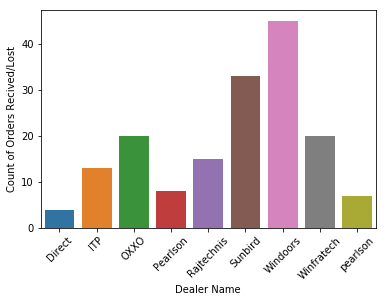

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x='Dealer Name', y=' Order Recd\\Lost ',data=countoforders)
plt.xticks(rotation=45)
plt.ylabel('Count of Orders Recived/Lost')
plt.savefig('DealerNamevsOrderCount.jpg', dpi=200)

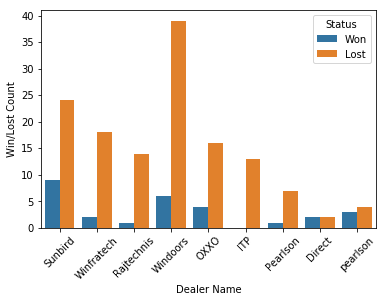

In [89]:
sns.countplot(x='Dealer Name',  data=rt_dealer,hue='Status')
plt.xticks(rotation=45)
plt.ylabel('Win/Lost Count')
plt.savefig('DealerNamevsWinLostCount.jpg', dpi=150)

In [90]:
def func(x):
    b=dict(win=x[x['Status']=='Won']['Status'].count(),
           lost=x[x['Status']=='Lost']['Status'].count())
    return Series(b)

In [91]:
rt_fin=rt_dealer.groupby(rt_dealer['Dealer Name']).apply(func)
rt_fin

,win,lost
Dealer Name,,
Direct,2,2
ITP,0,13
OXXO,4,16
Pearlson,1,7
Rajtechnis,1,14
Sunbird,9,24
Windoors,6,39
Winfratech,2,18
pearlson,3,4


In [92]:
rt_fin['Win %']=list(map(lambda x,y:(x/(x+y))*100,rt_fin['win'],rt_fin['lost']))
rt_fin

,win,lost,Win %
Dealer Name,,,
Direct,2,2,50.000000
ITP,0,13,0.000000
OXXO,4,16,20.000000
Pearlson,1,7,12.500000
Rajtechnis,1,14,6.666667
Sunbird,9,24,27.272727
Windoors,6,39,13.333333
Winfratech,2,18,10.000000
pearlson,3,4,42.857143


In [93]:
rt_fin.reset_index(level=0, inplace=True)
rt_fin

,Dealer Name,win,lost,Win %
0,Direct,2,2,50.000000
1,ITP,0,13,0.000000
2,OXXO,4,16,20.000000
3,Pearlson,1,7,12.500000
4,Rajtechnis,1,14,6.666667
5,Sunbird,9,24,27.272727
6,Windoors,6,39,13.333333
7,Winfratech,2,18,10.000000
8,pearlson,3,4,42.857143


In [94]:
rt_fin.rename({'Win %':'Conversion Rate'}, axis=1, inplace=True)

In [95]:
rt_fin

,Dealer Name,win,lost,Conversion Rate
0,Direct,2,2,50.000000
1,ITP,0,13,0.000000
2,OXXO,4,16,20.000000
3,Pearlson,1,7,12.500000
4,Rajtechnis,1,14,6.666667
5,Sunbird,9,24,27.272727
6,Windoors,6,39,13.333333
7,Winfratech,2,18,10.000000
8,pearlson,3,4,42.857143


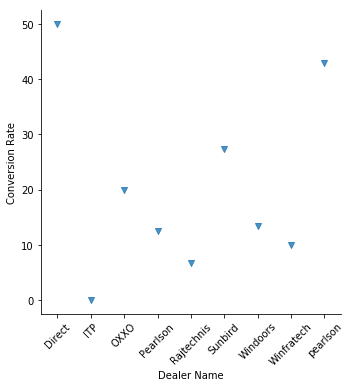

In [96]:
sns.lmplot(x='Dealer Name',y='Conversion Rate', data=rt_fin , fit_reg=False, markers='v')
plt.xticks(rotation=45)
plt.show()

In [97]:
rt_dealer.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
rt_dealer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 227
Data columns (total 40 columns):
Month                                        165 non-null object
Enquiry Date                                 165 non-null object
Enquiry Id                                   165 non-null object
Allocation Status                            165 non-null object
Status                                       165 non-null object
State                                        165 non-null object
City                                         165 non-null object
Pincode                                      165 non-null int64
Type of Project                              165 non-null object
No of Windows                                165 non-null object
Source                                       165 non-null object
Zone                                         165 non-null object
Dealer Name                                  165 non-null object
First Action-Call made                       165 no

In [99]:
rt_dealer['Q Val. (Rs. Lac)'].isnull().sum()

37

In [100]:
rt_dealer.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,165.000000,128.000000,26.000000,26.000000,0.0,165.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,602163.848485,1.717734,1.958846,8.730769,NaN,1033.030303,0.238095,0.666667,0.380952,0.047619,0.047619,0.190476
std,7658.448950,1.951093,2.484276,11.721971,NaN,162.868510,0.436436,0.483046,0.497613,0.218218,0.218218,0.402374
min,600001.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,600028.000000,0.582500,0.557500,1.250000,NaN,921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600052.000000,1.000000,1.155000,4.500000,NaN,1040.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,600099.000000,2.000000,1.525000,8.750000,NaN,1129.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,635810.000000,10.950000,10.950000,45.000000,NaN,1980.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
rt_dealer.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
temp=rt_dealer[rt_dealer['Q Val. (Rs. Lac)'].notnull()==True]

In [103]:
temp.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,April'16,12-Apr-16,EC12041647402,Dealer,Lost,TAMILNADU,VELLORE,635751,Renovation,6 to 10,...,NaN,NaN,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,April'16,15-Apr-16,EC15041647749,Dealer,Lost,TAMILNADU,CHENNAI,600113,New Construction,6 to 10,...,NaN,Price Issue,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,April'16,15-Apr-16,EC15041647740,Dealer,Lost,TAMILNADU,CHENNAI,600107,New Construction,1 to 5,...,NaN,Price Issue,1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
temp['Q Val. (Rs. Lac)'].notnull().sum()

128

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


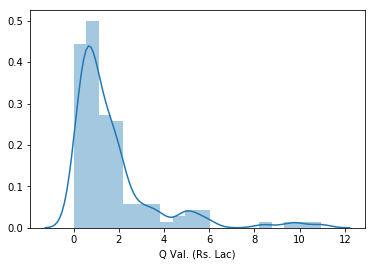

In [105]:
sns.distplot(temp['Q Val. (Rs. Lac)'])

In [106]:
print(temp['Q Val. (Rs. Lac)'].kurt())
print(temp['Q Val. (Rs. Lac)'].skew())

7.898833109880206
2.6204201819890183


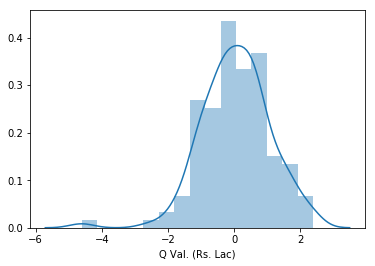

In [107]:
sns.distplot(np.log(temp['Q Val. (Rs. Lac)']))

In [108]:
print(np.log(temp['Q Val. (Rs. Lac)']).kurt())
print(np.log(temp['Q Val. (Rs. Lac)']).skew())

2.389412854283539
-0.5582453801437712


In [109]:
temp.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,128.000000,128.000000,26.000000,26.000000,0.0,128.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,602471.835938,1.717734,1.958846,8.730769,NaN,1034.015625,0.238095,0.666667,0.380952,0.047619,0.047619,0.190476
std,8092.611744,1.951093,2.484276,11.721971,NaN,177.218979,0.436436,0.483046,0.497613,0.218218,0.218218,0.402374
min,600004.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,600029.000000,0.582500,0.557500,1.250000,NaN,899.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600053.000000,1.000000,1.155000,4.500000,NaN,1034.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,600101.250000,2.000000,1.525000,8.750000,NaN,1139.250000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,635751.000000,10.950000,10.950000,45.000000,NaN,1980.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
# OUTLIER TREATMENT IS NOT REQUIRED  BUT IF REQUIRED BELOW IS THE PROCESS
# NOT FILLING NULL VALUES BECAUSE NO NEED OF VALUES FOR LOST DEAL
q3=temp['Q Val. (Rs. Lac)'].quantile(0.75)
q1=temp['Q Val. (Rs. Lac)'].quantile(0.25)

In [111]:
iqr=q3-q1
iqr

1.4175

In [112]:
low=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
upper

4.12625

In [113]:
temp1=temp[(temp['Q Val. (Rs. Lac)']<upper) & (temp['Q Val. (Rs. Lac)']>low)]

In [114]:
temp1

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
7,April'16,12-Apr-16,EC12041647402,Dealer,Lost,TAMILNADU,VELLORE,635751,Renovation,6 to 10,...,NaN,NaN,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,April'16,15-Apr-16,EC15041647749,Dealer,Lost,TAMILNADU,CHENNAI,600113,New Construction,6 to 10,...,NaN,Price Issue,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,April'16,15-Apr-16,EC15041647740,Dealer,Lost,TAMILNADU,CHENNAI,600107,New Construction,1 to 5,...,NaN,Price Issue,1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,April'16,18-Apr-16,EC18041647862,Dealer,Lost,TAMILNADU,CHENNAI,600092,Renovation,1 to 5,...,NaN,Price Issue,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,April'16,18-Apr-16,EC18041647914,Dealer,Won,TAMILNADU,CHENNAI,600020,New Construction,6 to 10,...,NaN,NaN,1293,Reduce AC Energy Cost & Street Noise,0.0,1.0,0.0,0.0,0.0,1.0
16,April'16,20-Apr-16,EC20041648053,Dealer,Lost,TAMILNADU,CHENNAI,600008,Renovation,1 to 5,...,NaN,Price Issue,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,April'16,21-Apr-16,EC21041648139,Dealer,Won,TAMILNADU,CHENNAI,600078,New Construction,6 to 10,...,NaN,NaN,1200,Reduce Street Noise,0.0,1.0,0.0,0.0,0.0,0.0
19,April'16,22-Apr-16,EC22041648210,Dealer,Lost,TAMILNADU,CHENNAI,600040,Renovation,1 to 5,...,NaN,Design Infeasibility,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,April'16,22-Apr-16,EC21041648139,Dealer,Won,TAMILNADU,CHENNAI,600078,Renovation,6 to 10,...,NaN,NaN,948,Reduce Street Noise,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 227
Data columns (total 40 columns):
Month                                        116 non-null object
Enquiry Date                                 116 non-null object
Enquiry Id                                   116 non-null object
Allocation Status                            116 non-null object
Status                                       116 non-null object
State                                        116 non-null object
City                                         116 non-null object
Pincode                                      116 non-null int64
Type of Project                              116 non-null object
No of Windows                                116 non-null object
Source                                       116 non-null object
Zone                                         116 non-null object
Dealer Name                                  116 non-null object
First Action-Call made                       116 no

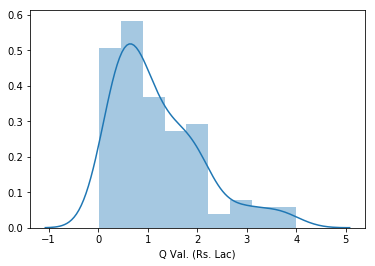

In [116]:
sns.distplot(temp1['Q Val. (Rs. Lac)'])

In [117]:
print(temp['Q Val. (Rs. Lac)'].kurt())
print(temp['Q Val. (Rs. Lac)'].skew())
print(temp1['Q Val. (Rs. Lac)'].kurt())
print(temp1['Q Val. (Rs. Lac)'].skew())

7.898833109880206
2.6204201819890183
0.977744012675998
1.1627831964755577


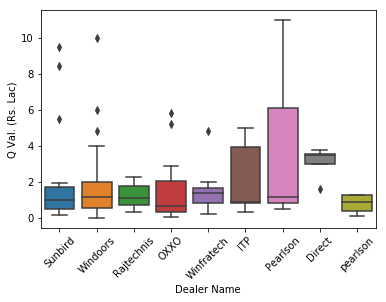

In [118]:
sns.boxplot(x='Dealer Name', y='Q Val. (Rs. Lac)', data=temp)
plt.xticks(rotation=45)
plt.savefig('QValvsDealerName.jpg')

In [119]:
def money(x):
    b=dict(total=x['Q Val. (Rs. Lac)'].sum())
    return Series(b)

In [120]:
valuemoney=temp.groupby('Dealer Name').apply(money)
valuemoney

,total
Dealer Name,
Direct,12.38
ITP,17.45
OXXO,26.49
Pearlson,12.65
Rajtechnis,14.81
Sunbird,46.41
Windoors,69.82
Winfratech,16.62
pearlson,3.24


In [121]:
valuemoney.reset_index(level=0, inplace=True)

Text(0.5, 1.0, 'For Status = WON')

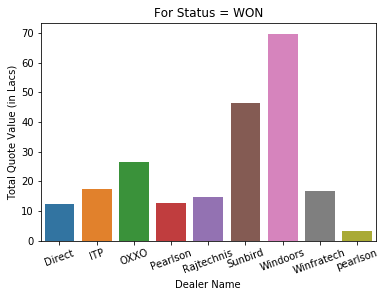

In [122]:
sns.barplot(x='Dealer Name',y='total', data=valuemoney)
plt.xticks(rotation=20)
plt.ylabel('Total Quote Value (in Lacs)')
plt.savefig('TotalValue.jpg')
plt.title('For Status = WON')

In [123]:
valuemoney

,Dealer Name,total
0,Direct,12.38
1,ITP,17.45
2,OXXO,26.49
3,Pearlson,12.65
4,Rajtechnis,14.81
5,Sunbird,46.41
6,Windoors,69.82
7,Winfratech,16.62
8,pearlson,3.24


# FINAL WORKING

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
rt.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
rt1=rt[rt['Dealer Name']!='Direct']

In [127]:
rt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 227
Data columns (total 40 columns):
Month                                        166 non-null object
Enquiry Date                                 166 non-null object
Enquiry Id                                   166 non-null object
Allocation Status                            166 non-null object
Status                                       166 non-null object
State                                        166 non-null object
City                                         166 non-null object
Pincode                                      166 non-null int64
Type of Project                              166 non-null object
No of Windows                                166 non-null object
Source                                       166 non-null object
Zone                                         166 non-null object
Dealer Name                                  166 non-null object
First Action-Call made                       166 no

In [128]:
rt2=rt1[rt1['Allocation Status']=='Dealer']

In [129]:
rt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 227
Data columns (total 40 columns):
Month                                        161 non-null object
Enquiry Date                                 161 non-null object
Enquiry Id                                   161 non-null object
Allocation Status                            161 non-null object
Status                                       161 non-null object
State                                        161 non-null object
City                                         161 non-null object
Pincode                                      161 non-null int64
Type of Project                              161 non-null object
No of Windows                                161 non-null object
Source                                       161 non-null object
Zone                                         161 non-null object
Dealer Name                                  161 non-null object
First Action-Call made                       161 no

In [130]:
rt2['Dealer Name'].unique()

array(['Sunbird', 'Winfratech', 'Rajtechnis', 'Windoors', 'OXXO', 'ITP',
       'Pearlson', 'pearlson'], dtype=object)

In [131]:
rt2['Dealer Name'].replace({'pearlson':'Pearlson'}, inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [132]:
rt2['Dealer Name'].unique()

array(['Sunbird', 'Winfratech', 'Rajtechnis', 'Windoors', 'OXXO', 'ITP',
       'Pearlson'], dtype=object)

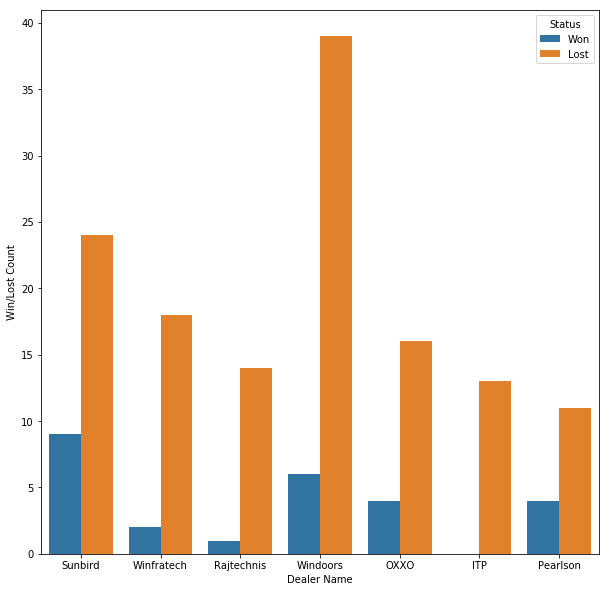

In [210]:
# WIN-LOST COUNT PER DEALER
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.countplot(x='Dealer Name',  hue='Status',data=rt2)
#plt.xticks(rotation=13)
plt.ylabel('Win/Lost Count')
plt.savefig('DealerNamevsWinLostCount_1.jpg')

In [134]:
rt3=rt2.groupby(rt2['Dealer Name']).apply(func)
rt3.reset_index(level=0, inplace=True)

In [135]:
rt3

,Dealer Name,win,lost
0,ITP,0,13
1,OXXO,4,16
2,Pearlson,4,11
3,Rajtechnis,1,14
4,Sunbird,9,24
5,Windoors,6,39
6,Winfratech,2,18


In [136]:
rt3['Conversion Rate']=list(map(lambda x,y:(x/(x+y))*100,rt3['win'],rt3['lost'])) # calculating conversion rate

In [137]:
rt3

,Dealer Name,win,lost,Conversion Rate
0,ITP,0,13,0.000000
1,OXXO,4,16,20.000000
2,Pearlson,4,11,26.666667
3,Rajtechnis,1,14,6.666667
4,Sunbird,9,24,27.272727
5,Windoors,6,39,13.333333
6,Winfratech,2,18,10.000000


In [138]:
t1=rt2[rt2['Order Val. (Rs. Lac)'].notnull()==True] # TAKING DATA WHO HAVE A WIN status

In [139]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 221
Data columns (total 40 columns):
Month                                        24 non-null object
Enquiry Date                                 24 non-null object
Enquiry Id                                   24 non-null object
Allocation Status                            24 non-null object
Status                                       24 non-null object
State                                        24 non-null object
City                                         24 non-null object
Pincode                                      24 non-null int64
Type of Project                              24 non-null object
No of Windows                                24 non-null object
Source                                       24 non-null object
Zone                                         24 non-null object
Dealer Name                                  24 non-null object
First Action-Call made                       24 non-null object
D

In [140]:
def money_1(x): # CALCULATING THE VALUE THAT EACH DEALER BRINGS TO THE FIRM
    b=dict(total=x['Order Val. (Rs. Lac)'].sum())
    return Series(b)

In [141]:
ordermoney=rt2.groupby('Dealer Name').apply(money_1)
ordermoney

,total
Dealer Name,
ITP,0.00
OXXO,7.39
Pearlson,13.77
Rajtechnis,0.53
Sunbird,10.30
Windoors,11.54
Winfratech,2.11


In [142]:
ordermoney.reset_index(level=0, inplace=True)
ordermoney

,Dealer Name,total
0,ITP,0.00
1,OXXO,7.39
2,Pearlson,13.77
3,Rajtechnis,0.53
4,Sunbird,10.30
5,Windoors,11.54
6,Winfratech,2.11


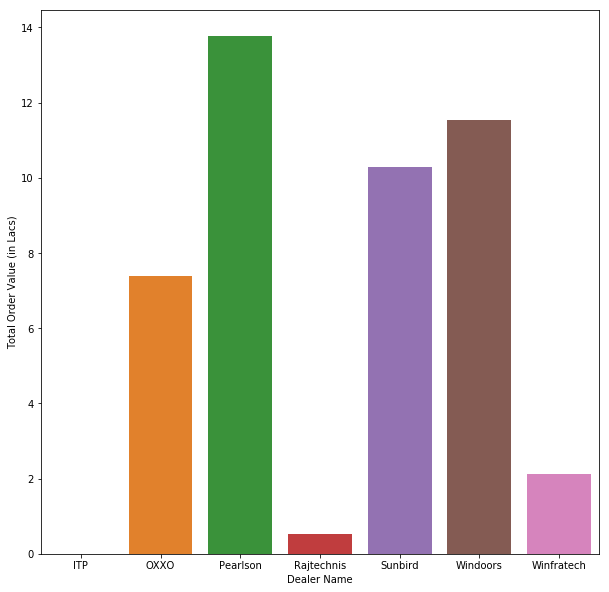

In [211]:
plt.subplots(figsize=(10,10))
sns.barplot(x='Dealer Name',y='total', data=ordermoney)
#plt.xticks(rotation=20)
plt.ylabel('Total Order Value (in Lacs)')
plt.savefig('TotalOrderValue.jpg')
#plt.title('For Status = WON')

In [144]:
# For identifying why are the dealers under performing
print(rt['Remarks'].nunique())
rt['Remarks'].unique()

13


array([nan, 'Price Issue', 'Delivery Issue', 'Budget Constraint',
       'Design Infeasibility', 'Delivery Issve', 'Design Infeasibe My',
       'No Requirement-Awareness Call', 'Price issue', 'Others',
       'Design Not Feasible', 'Service Infeasibility', 'No Requirement',
       'No Requirment'], dtype=object)

In [145]:
rt.replace({'Price issue':'Price Issue','No Requirment':'No Requirement'},inplace=True)

In [146]:
print(rt['Remarks'].nunique())
rt['Remarks'].unique()

11


array([nan, 'Price Issue', 'Delivery Issue', 'Budget Constraint',
       'Design Infeasibility', 'Delivery Issve', 'Design Infeasibe My',
       'No Requirement-Awareness Call', 'Others', 'Design Not Feasible',
       'Service Infeasibility', 'No Requirement'], dtype=object)

In [147]:
rt.replace({'Delivery Issve':'Delivery Issue'}, inplace=True)

In [148]:
print(rt['Remarks'].nunique())
rt['Remarks'].unique()

10


array([nan, 'Price Issue', 'Delivery Issue', 'Budget Constraint',
       'Design Infeasibility', 'Design Infeasibe My',
       'No Requirement-Awareness Call', 'Others', 'Design Not Feasible',
       'Service Infeasibility', 'No Requirement'], dtype=object)

In [149]:
dealer=rt[rt['Allocation Status']=='Dealer']

In [150]:
dealer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 227
Data columns (total 40 columns):
Month                                        165 non-null object
Enquiry Date                                 165 non-null object
Enquiry Id                                   165 non-null object
Allocation Status                            165 non-null object
Status                                       165 non-null object
State                                        165 non-null object
City                                         165 non-null object
Pincode                                      165 non-null int64
Type of Project                              165 non-null object
No of Windows                                165 non-null object
Source                                       165 non-null object
Zone                                         165 non-null object
Dealer Name                                  165 non-null object
First Action-Call made                       165 no

In [151]:
dealer1=dealer[dealer['Dealer Name']!='Direct']

In [152]:
dealer1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 227
Data columns (total 40 columns):
Month                                        161 non-null object
Enquiry Date                                 161 non-null object
Enquiry Id                                   161 non-null object
Allocation Status                            161 non-null object
Status                                       161 non-null object
State                                        161 non-null object
City                                         161 non-null object
Pincode                                      161 non-null int64
Type of Project                              161 non-null object
No of Windows                                161 non-null object
Source                                       161 non-null object
Zone                                         161 non-null object
Dealer Name                                  161 non-null object
First Action-Call made                       161 no

In [153]:
dealer1['Remarks'].unique()

array([nan, 'Price Issue', 'Delivery Issue', 'Budget Constraint',
       'Design Infeasibility', 'Design Infeasibe My',
       'No Requirement-Awareness Call', 'Others', 'Design Not Feasible',
       'No Requirement'], dtype=object)

In [154]:
dealer1.groupby(dealer1['Remarks']).count()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Remarks-Brand and value if lost to UPVC,Second Action-Call Status.1,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
Remarks,,,,,,,,,,,,,,,,,,,,,
Budget Constraint,20,20,20,20,20,20,20,20,20,20,...,8,0,20,0,0,0,0,0,0,0
Delivery Issue,3,3,3,3,3,3,3,3,3,3,...,2,0,3,0,0,0,0,0,0,0
Design Infeasibe My,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
Design Infeasibility,20,20,20,20,20,20,20,20,20,20,...,11,0,20,0,0,0,0,0,0,0
Design Not Feasible,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
No Requirement,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
No Requirement-Awareness Call,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
Others,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
Price Issue,82,82,82,82,82,82,82,82,82,82,...,59,0,82,0,0,0,0,0,0,0


In [155]:
# HANDLING NULL VALUES
#AS WE CAN SEE PRICE ISSUE IS THE MODE. fILLING NAN VALUES WIH MODE
mode='Price Issue'
dealer1['Remarks'].fillna(mode,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [156]:
dealer1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 227
Data columns (total 40 columns):
Month                                        161 non-null object
Enquiry Date                                 161 non-null object
Enquiry Id                                   161 non-null object
Allocation Status                            161 non-null object
Status                                       161 non-null object
State                                        161 non-null object
City                                         161 non-null object
Pincode                                      161 non-null int64
Type of Project                              161 non-null object
No of Windows                                161 non-null object
Source                                       161 non-null object
Zone                                         161 non-null object
Dealer Name                                  161 non-null object
First Action-Call made                       161 no

In [157]:
dealer1['Remarks'].unique() # NO NULLS

array(['Price Issue', 'Delivery Issue', 'Budget Constraint',
       'Design Infeasibility', 'Design Infeasibe My',
       'No Requirement-Awareness Call', 'Others', 'Design Not Feasible',
       'No Requirement'], dtype=object)

In [158]:
ordermoney

,Dealer Name,total
0,ITP,0.00
1,OXXO,7.39
2,Pearlson,13.77
3,Rajtechnis,0.53
4,Sunbird,10.30
5,Windoors,11.54
6,Winfratech,2.11


In [159]:
ordermoney.describe()

,total
count,7.000000
mean,6.520000
std,5.636884
min,0.000000
25%,1.320000
50%,7.390000
75%,10.920000
max,13.770000


In [160]:
lost=dealer1[dealer1['Status']=='Lost']

In [161]:
lost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 227
Data columns (total 40 columns):
Month                                        135 non-null object
Enquiry Date                                 135 non-null object
Enquiry Id                                   135 non-null object
Allocation Status                            135 non-null object
Status                                       135 non-null object
State                                        135 non-null object
City                                         135 non-null object
Pincode                                      135 non-null int64
Type of Project                              135 non-null object
No of Windows                                135 non-null object
Source                                       135 non-null object
Zone                                         135 non-null object
Dealer Name                                  135 non-null object
First Action-Call made                       135 no

In [162]:
# Mean = 6.52 . So dealers less than this are under performers

ordermoney[ordermoney<ordermoney['total'].mean()]
# These 3 are under performers

,Dealer Name,total
0,ITP,0.00
1,OXXO,NaN
2,Pearlson,NaN
3,Rajtechnis,0.53
4,Sunbird,NaN
5,Windoors,NaN
6,Winfratech,2.11


In [163]:
lst1=list(ordermoney[ordermoney[ordermoney<ordermoney['total'].mean()]['total'].notnull()]['Dealer Name'])
lst1

['ITP', 'Rajtechnis', 'Winfratech']

In [164]:
undp_money=lost[lost['Dealer Name'].isin(lst1)]
undp_money['Dealer Name'].unique()

array(['Winfratech', 'Rajtechnis', 'ITP'], dtype=object)

In [165]:
#lost_fin=lost[((lost['Dealer Name']=='Rajtechnis') | (lost['Dealer Name']=='Winfratech') |
            #(lost['Dealer Name']=='ITP'))]

In [166]:
undp_money.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,April'16,18-Apr-16,EC18041647862,Dealer,Lost,TAMILNADU,CHENNAI,600092,Renovation,1 to 5,...,NaN,Price Issue,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,April'16,25-Apr-16,EC06101535268,Dealer,Lost,TAMILNADU,CHENNAI,600010,Renovation,6 to 10,...,NaN,Price Issue,934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,April'16,26-Apr-16,EC2002143733,Dealer,Lost,TAMILNADU,CHENNAI,600004,New Construction,1 to 5,...,NaN,Budget Constraint,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


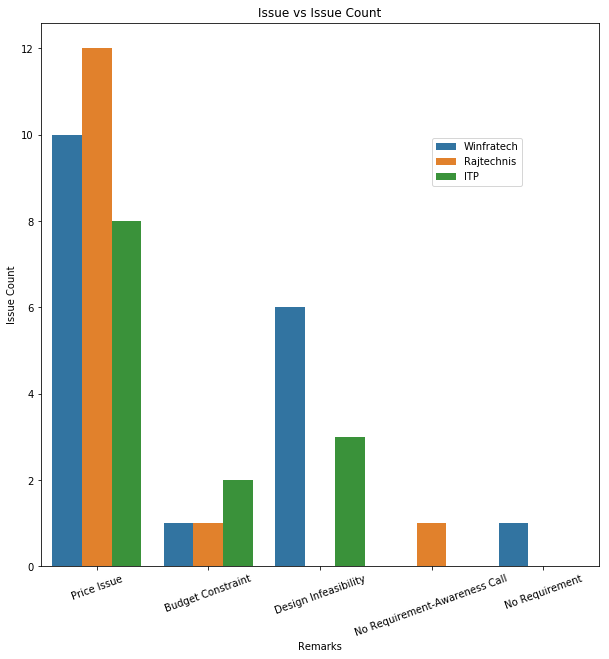

In [167]:
plt.subplots(figsize=(10,10))
sns.countplot(x='Remarks',hue='Dealer Name', data=undp_money)
plt.xticks(rotation=20)
plt.ylabel('Issue Count')
plt.title('Issue vs Issue Count')
plt.savefig('IssuesForUnderPerformers_money.jpg')
plt.legend(loc=(0.7,0.7))

In [168]:
rt3

,Dealer Name,win,lost,Conversion Rate
0,ITP,0,13,0.000000
1,OXXO,4,16,20.000000
2,Pearlson,4,11,26.666667
3,Rajtechnis,1,14,6.666667
4,Sunbird,9,24,27.272727
5,Windoors,6,39,13.333333
6,Winfratech,2,18,10.000000


In [169]:
rt3[rt3['Conversion Rate']<rt3['Conversion Rate'].mean()]

,Dealer Name,win,lost,Conversion Rate
0,ITP,0,13,0.000000
3,Rajtechnis,1,14,6.666667
5,Windoors,6,39,13.333333
6,Winfratech,2,18,10.000000


In [170]:
rt3['Conversion Rate'].mean()

14.848484848484848

In [171]:
rt3.describe()

,win,lost,Conversion Rate
count,7.000000,7.000000,7.000000
mean,3.714286,19.285714,14.848485
std,3.093773,9.655988,10.277747
min,0.000000,11.000000,0.000000
25%,1.500000,13.500000,8.333333
50%,4.000000,16.000000,13.333333
75%,5.000000,21.000000,23.333333
max,9.000000,39.000000,27.272727


In [172]:
lst2=rt3[rt3['Conversion Rate']<rt3['Conversion Rate'].mean()]['Dealer Name']

In [173]:
undp_rate=lost[lost['Dealer Name'].isin(lst2)]

In [174]:
undp_rate.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,April'16,12-Apr-16,EC12041647402,Dealer,Lost,TAMILNADU,VELLORE,635751,Renovation,6 to 10,...,NaN,Price Issue,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,April'16,15-Apr-16,EC15041647740,Dealer,Lost,TAMILNADU,CHENNAI,600107,New Construction,1 to 5,...,NaN,Price Issue,1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,April'16,18-Apr-16,EC18041647862,Dealer,Lost,TAMILNADU,CHENNAI,600092,Renovation,1 to 5,...,NaN,Price Issue,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


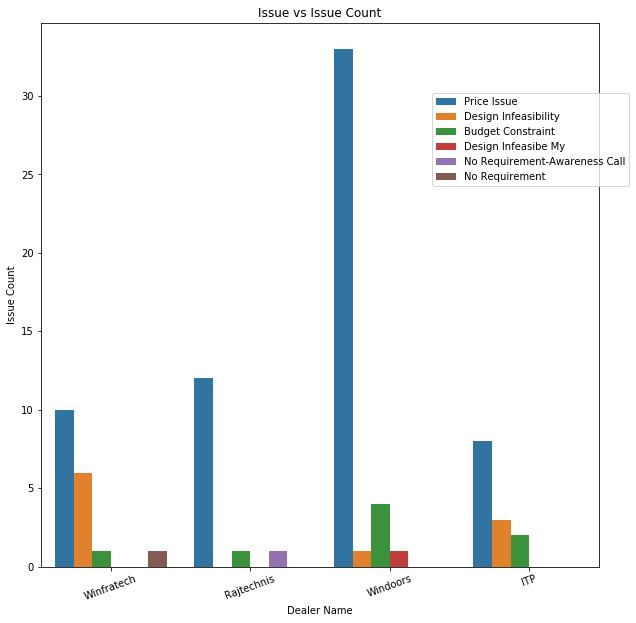

In [175]:
plt.subplots(figsize=(10,10))
sns.countplot(x='Dealer Name',hue='Remarks', data=undp_rate)
plt.xticks(rotation=20)
plt.ylabel('Issue Count')
plt.title('Issue vs Issue Count')
plt.savefig('IssuesForUnderPerformers_rate.jpg')

plt.legend(loc=(0.7,0.7))
plt.show()

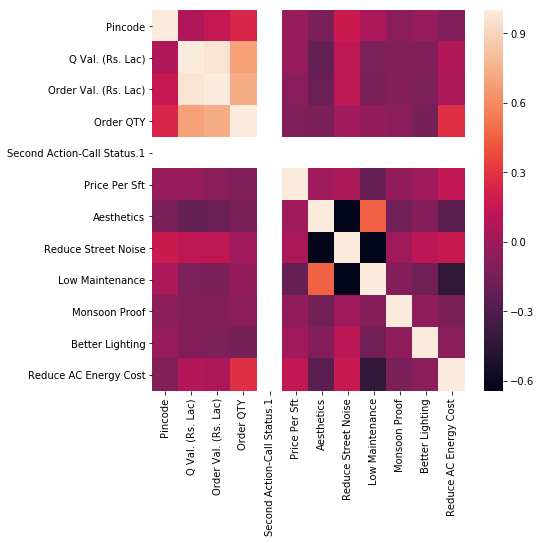

In [176]:
plt.subplots(figsize=(7,7))
sns.heatmap(rt.corr())
plt.savefig('HeatMapCorr.jpg', dpi=200)

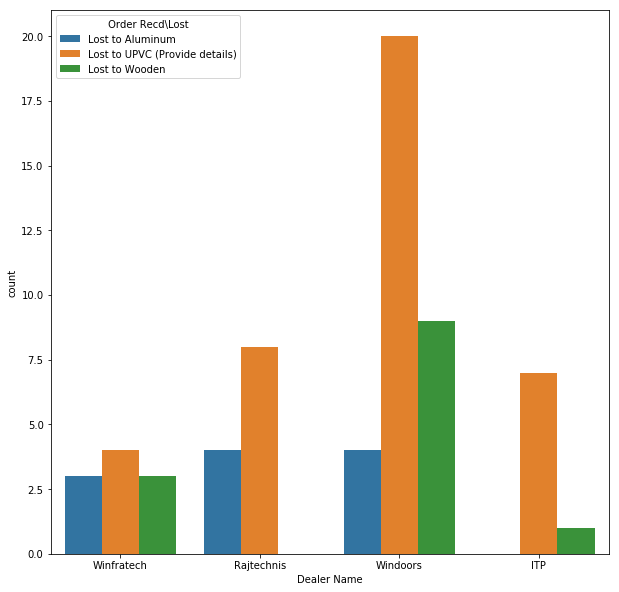

In [177]:
# which price issue is contributing the most to the dealers under performance
plt.subplots(figsize=(10,10))
sns.countplot(x='Dealer Name', hue=' Order Recd\Lost ',data=undp_rate[undp_rate['Remarks']=='Price Issue'])
#plt.xticks(rotation=20)
#plt.ylabel('Issue Count')
#plt.title('Issue vs Issue Count')
plt.savefig('PriceIssueForUnderPerformers_rate.jpg')


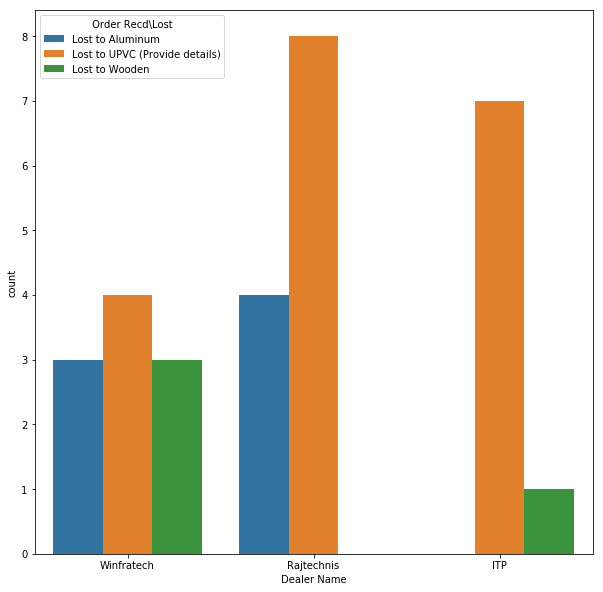

In [178]:
  plt.subplots(figsize=(10,10))
sns.countplot(x='Dealer Name', hue=' Order Recd\Lost ',data=undp_money[undp_money['Remarks']=='Price Issue'])
#plt.xticks(rotation=20)
#plt.ylabel('Issue Count')
#plt.title('Issue vs Issue Count')
plt.savefig('PriceIssueForUnderPerformers_money.jpg')


In [179]:
rt2['Status'].unique()

array(['Won', 'Lost'], dtype=object)

In [180]:
finalarr=rt2[rt2['Status']=='Won']

In [181]:
finalarr.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
12,April'16,17-Apr-16,EC17041647824,Dealer,Won,TAMILNADU,CHENNAI,600028,New Construction,1 to 5,...,NaN,NaN,1450,Nil,NaN,NaN,NaN,NaN,NaN,NaN
14,April'16,18-Apr-16,EC18041647914,Dealer,Won,TAMILNADU,CHENNAI,600020,New Construction,6 to 10,...,NaN,NaN,1293,Reduce AC Energy Cost & Street Noise,0.0,1.0,0.0,0.0,0.0,1.0
17,April'16,21-Apr-16,EC21041648143,Dealer,Won,TAMILNADU,CHENNAI,600029,Renovation,21 to 40,...,NaN,NaN,1050,Reduce AC Energy Cost & Street Noise,0.0,1.0,0.0,0.0,0.0,1.0
18,April'16,21-Apr-16,EC21041648139,Dealer,Won,TAMILNADU,CHENNAI,600078,New Construction,6 to 10,...,NaN,NaN,1200,Reduce Street Noise,0.0,1.0,0.0,0.0,0.0,0.0


In [182]:
finalarr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 221
Data columns (total 40 columns):
Month                                        26 non-null object
Enquiry Date                                 26 non-null object
Enquiry Id                                   26 non-null object
Allocation Status                            26 non-null object
Status                                       26 non-null object
State                                        26 non-null object
City                                         26 non-null object
Pincode                                      26 non-null int64
Type of Project                              26 non-null object
No of Windows                                26 non-null object
Source                                       26 non-null object
Zone                                         26 non-null object
Dealer Name                                  26 non-null object
First Action-Call made                       26 non-null object
D

In [183]:
finalarr.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,26.000000,26.000000,24.000000,24.000000,0.0,26.000000,20.000000,20.000000,20.00000,20.0,20.000000,20.000000
mean,600203.846154,2.091538,1.901667,7.708333,NaN,1153.961538,0.250000,0.700000,0.35000,0.0,0.050000,0.200000
std,562.456590,2.810554,2.559672,11.441645,NaN,276.449703,0.444262,0.470162,0.48936,0.0,0.223607,0.410391
min,600004.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
25%,600021.000000,0.575000,0.537500,1.000000,NaN,974.500000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
50%,600034.500000,1.250000,1.080000,4.000000,NaN,1125.500000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000
75%,600090.000000,1.617500,1.507500,7.250000,NaN,1277.250000,0.250000,1.000000,1.00000,0.0,0.000000,0.000000
max,602117.000000,10.950000,10.950000,45.000000,NaN,1980.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000


In [184]:
finalarr['Order Val. (Rs. Lac)'].unique()

array([ 0.54,  3.85,  0.88,  5.23,  1.5 ,   nan,  1.22,  0.39,  0.86,
       10.95,  0.61,  0.53,  1.48,  0.68,  1.07,  7.05,  1.53,  1.28,
        1.09,  1.39,  0.07,  0.15,  2.89,  0.2 ])

In [185]:
finalarr[finalarr['Order Val. (Rs. Lac)'].isnull()==True]

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
20,April'16,22-Apr-16,EC21041648139,Dealer,Won,TAMILNADU,CHENNAI,600078,Renovation,6 to 10,...,NaN,NaN,948,Reduce Street Noise,0.0,1.0,0.0,0.0,0.0,0.0
144,Sept'16,21-Sep-16,EC21091659558,Dealer,Won,TAMILNADU,CHENNAI,600040,New Construction,21 to 40,...,NaN,NaN,1129,Reduce Street Noise & Low Maintenance,0.0,1.0,1.0,0.0,0.0,0.0


In [186]:
finalarr['Q Val. (Rs. Lac)'].isnull().sum()

0

In [187]:
finalarr['Quote QTY'].replace({'`1':'1'}, inplace=True)

In [188]:
finalarr['Q Val(Rs. Lac) Per Unit']=list(map(lambda x,y: x/y,finalarr['Q Val. (Rs. Lac)'],int(finalarr['Quote QTY'])))

TypeError: cannot convert the series to <class 'int'>

In [189]:
lst=[]
for i in range(len(finalarr['Month'])):
    lst.append(float(finalarr.iloc[i,23]))
print(lst)

[3.0, 4.0, 3.0, 45.0, 7.0, 7.0, 3.0, 1.0, 0.6, 13.0, 1.0, 4.0, 3.0, 2.0, 2.0, 11.0, 39.0, 10.0, 8.0, 2.0, 7.0, 1.0, 1.0, 12.0, 1.0, 1.0]


In [190]:
finalarr['Order QTY'].unique()

array([ 3.,  5.,  7., 45., nan,  1., 13.,  4.,  2., 41.,  9.,  8.,  6.,
       12.])

In [191]:
finalarr.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,26.000000,26.000000,24.000000,24.000000,0.0,26.000000,20.000000,20.000000,20.00000,20.0,20.000000,20.000000
mean,600203.846154,2.091538,1.901667,7.708333,NaN,1153.961538,0.250000,0.700000,0.35000,0.0,0.050000,0.200000
std,562.456590,2.810554,2.559672,11.441645,NaN,276.449703,0.444262,0.470162,0.48936,0.0,0.223607,0.410391
min,600004.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
25%,600021.000000,0.575000,0.537500,1.000000,NaN,974.500000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
50%,600034.500000,1.250000,1.080000,4.000000,NaN,1125.500000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000
75%,600090.000000,1.617500,1.507500,7.250000,NaN,1277.250000,0.250000,1.000000,1.00000,0.0,0.000000,0.000000
max,602117.000000,10.950000,10.950000,45.000000,NaN,1980.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000


In [192]:
# HANDLING NULL VALUES BY FILLING ORDER QTY NULL VALUES WITH QUOTE QTY VALUES
finalarr['Order QTY'].fillna(finalarr['Quote QTY'],inplace=True)

In [193]:
finalarr['Order QTY'].isnull().sum()

0

In [194]:
finalarr['Q Val(Rs. Lac) Per Unit']=list(map(lambda x,y: x/y,finalarr['Q Val. (Rs. Lac)'],lst))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
finalarr['Q Val(Rs. Lac) Per Unit'].count()

26

In [196]:
lst1=[]
for i in range(len(finalarr['Month'])):
    lst1.append(float(finalarr.iloc[i,27]))
print(len(lst1))

26


In [197]:
finalarr['Order Val. (Rs. Lac)'].isnull().sum()

2

In [198]:
finalarr['Order Val. (Rs. Lac)'].fillna(finalarr['Q Val. (Rs. Lac)'],inplace=True)

In [199]:
finalarr['Order Val(Rs. Lac) Per Unit']=list(map(lambda x,y: x/y,finalarr['Order Val. (Rs. Lac)'],lst1))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
finalarr['Order Val(Rs. Lac) Per Unit'].count()

26

In [201]:
finalarr['Discount %']=list(map(lambda x,y: ((x-y)/x)*100,finalarr['Q Val(Rs. Lac) Per Unit'],finalarr['Order Val(Rs. Lac) Per Unit']))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [202]:
finalarr['Q Val(Rs. Lac) Per Unit'].mean()

0.39031113544575075

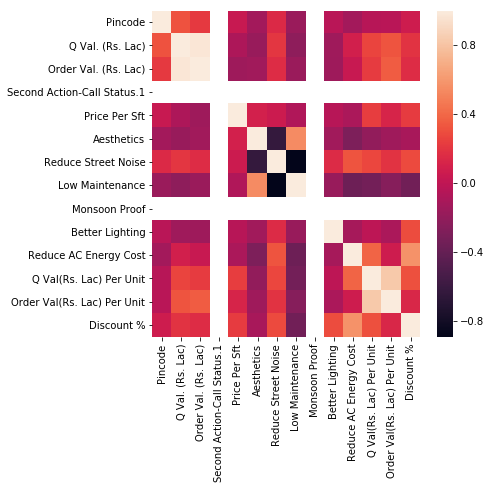

In [203]:
plt.subplots(figsize=(6,6))
sns.heatmap(finalarr.corr())

Text(0.5, 1.0, 'Month Wise Analysis')

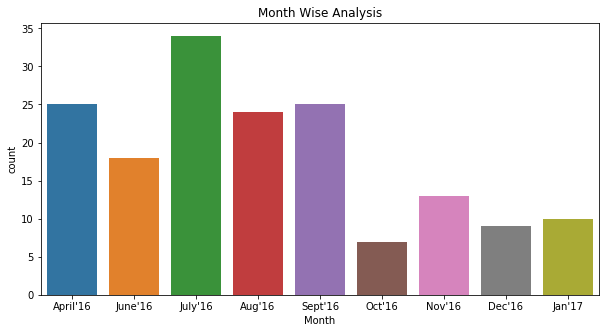

In [206]:
# month wise order count
plt.figure(figsize=(10,5))
sns.countplot(x='Month',data=dealer)
plt.title('Month Wise Analysis')

Text(0.5, 1.0, 'Source Wise Analysis')

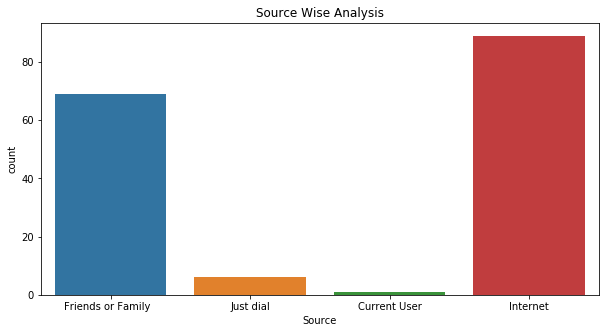

In [207]:
# source wise order count
plt.figure(figsize=(10,5))
sns.countplot(x='Source',data=dealer)
plt.title('Source Wise Analysis')

Text(0.5, 1.0, 'City Wise Analysis')

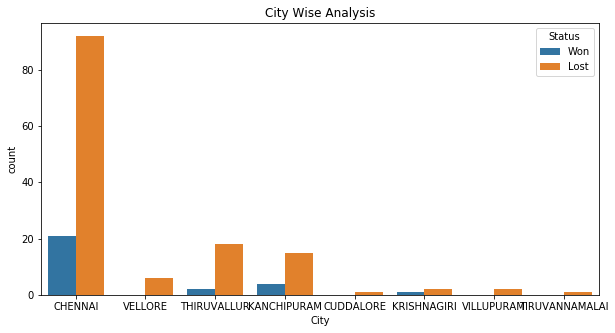

In [209]:
# city wise order count
plt.figure(figsize=(10,5))
sns.countplot(x='City',hue='Status',data=dealer)
plt.title('City Wise Analysis')